# **WK7 Data Visualization** <hr style="border:2.5px solid #126782"></hr>

**Name:** Gabriel Blaise Pusta <br>
**Course:** BSCPE2A

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv(r"C:\Users\User\Desktop\MATHEDA Pusta\WK7\raw\chip-dataset-cleaned.csv", 
                 delimiter = ",")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product       4854 non-null   object 
 1   Type          4854 non-null   object 
 2   Date          4854 non-null   object 
 3   Process_Size  4845 non-null   float64
 4   TDP           4854 non-null   float64
 5   Die_Size      4854 non-null   float64
 6   Transistors   4854 non-null   float64
 7   Frequency     4854 non-null   int64  
 8   Foundry       4854 non-null   object 
 9   Vendor        4854 non-null   object 
 10  FP16          536 non-null    float64
 11  FP32          1948 non-null   float64
 12  FP64          1306 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 493.1+ KB


In [63]:
df = df.drop(df.columns[[10,11,12]],axis=1)
df.head()

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD


## **N Chips Manufactured**

In [64]:
df_w = df.copy()

In [65]:
chip_count = df_w['Vendor'].value_counts()
chip_count

Vendor
AMD       1662
Intel     1392
NVIDIA    1201
ATI        535
Other       64
Name: count, dtype: int64

In [66]:
type(chip_count)

pandas.core.series.Series

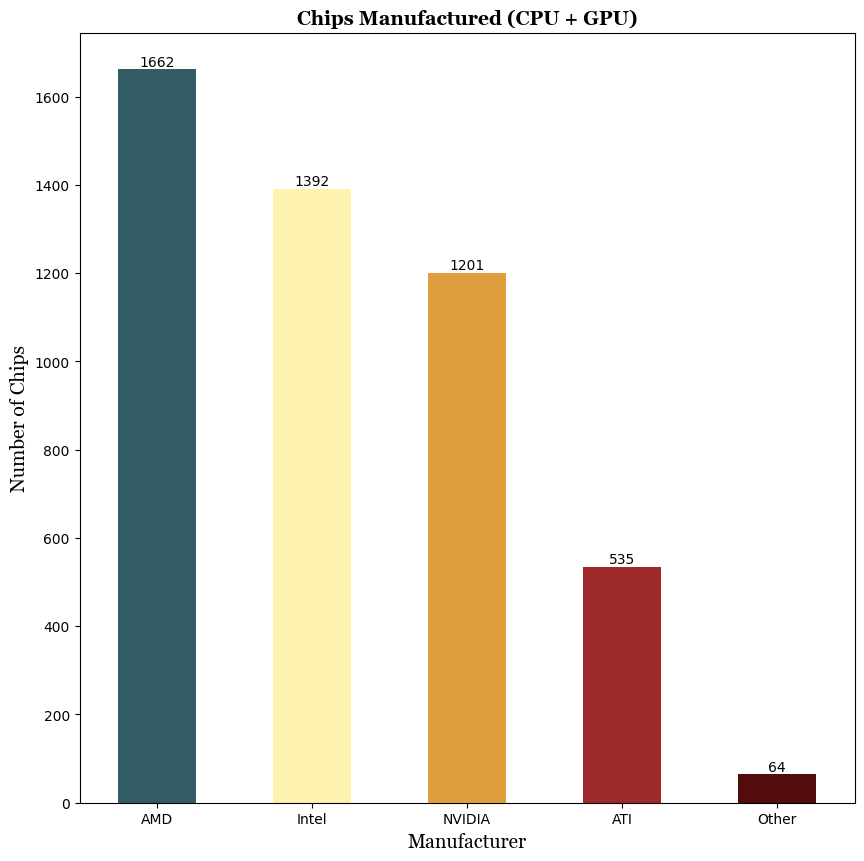

In [67]:
chart = chip_count.plot(kind='bar',
                        color = ['#335c67','#fff3b0','#e09f3e','#9e2a2b','#540b0e'],
                        figsize=(10,10))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Chips Manufactured (CPU + GPU)',
          fontfamily = 'Georgia',
          fontsize=14,
          fontweight='bold')
plt.xlabel('Manufacturer', fontfamily = 'Georgia', fontsize = 14)
chart.set_xticklabels(chip_count.index, rotation=0)
plt.ylabel('Number of Chips', fontfamily = 'Georgia', fontsize = 14)
plt.show()

## **N CPU Manufactured**

In [68]:
df_cpu = df_w[df_w['Type']=='CPU']
df_cpu

,Product,Type,Date,Process_Size,TDP,Die_Size,Transistors,Frequency,Foundry,Vendor
0,AMD Athlon 64 3500+,CPU,2/20/2007,65.0,45.0,77.000000,122.000000,2200,Unknown,AMD
1,AMD Athlon 200GE,CPU,9/6/2018,14.0,35.0,192.000000,4800.000000,3200,Unknown,AMD
2,Intel Core i5-1145G7,CPU,9/2/2020,10.0,28.0,188.440445,1929.922279,2600,Intel,Intel
3,Intel Xeon E5-2603 v2,CPU,9/1/2013,22.0,80.0,160.000000,1400.000000,1800,Intel,Intel
4,AMD Phenom II X4 980 BE,CPU,5/3/2011,45.0,125.0,258.000000,758.000000,3700,Unknown,AMD
...,...,...,...,...,...,...,...,...,...,...
2187,Intel Xeon Gold 6312U,CPU,4/6/2021,10.0,185.0,188.440445,1929.922279,2400,Intel,Intel
2188,AMD Ryzen 9 4900H,CPU,3/16/2020,7.0,54.0,156.000000,9800.000000,3300,TSMC,AMD
2189,Intel Core 2 Duo E6550,CPU,7/1/2007,65.0,65.0,143.000000,291.000000,2333,Intel,Intel
2190,AMD Opteron 246,CPU,12/1/2004,90.0,85.0,188.440445,106.000000,2000,Unknown,AMD


In [69]:
cpu_count = df_cpu['Vendor'].value_counts()
cpu_count

Vendor
Intel    1242
AMD       950
Name: count, dtype: int64

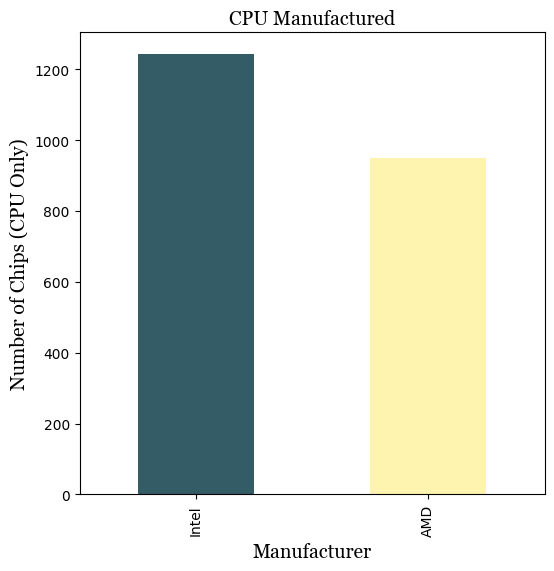

In [70]:
chart = cpu_count.plot(kind='bar',figsize=(6,6),
                       color = ['#335c67','#fff3b0'])
plt.title('CPU Manufactured' ,fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Number of Chips (CPU Only)' ,fontfamily = 'Georgia', fontsize = 14)
plt.xlabel('Manufacturer' ,fontfamily = 'Georgia', fontsize = 14)
plt.show()

## **Lowest TDP (Thermal Design Power)**

In [71]:
df_tdp = df_w[['Product','TDP']]
df_tdp

,Product,TDP
0,AMD Athlon 64 3500+,45.000000
1,AMD Athlon 200GE,35.000000
2,Intel Core i5-1145G7,28.000000
3,Intel Xeon E5-2603 v2,80.000000
4,AMD Phenom II X4 980 BE,125.000000
...,...,...
4849,NVIDIA Quadro 3000M,75.000000
4850,Intel GMA 950,7.000000
4851,NVIDIA GeForce GT 320M,23.000000
4852,NVIDIA GeForce FX 5200,81.359981


In [72]:
type(df_tdp)

pandas.core.frame.DataFrame

In [73]:
df_tdp = df_tdp.sort_values(by='TDP', ascending=False)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
4735,NVIDIA Quadro Plex 2200 D2,640.0
...,...,...
1550,Intel Atom Z500,1.0
1761,Intel Atom Z610,1.0
469,Intel Atom Z620,1.0
1964,Intel Atom Z600,1.0


In [74]:
df_tdp = df_tdp.head(7)
df_tdp

,Product,TDP
4821,NVIDIA Tesla S2050,900.0
2908,NVIDIA Tesla S1075,800.0
3603,NVIDIA Tesla S1070,800.0
4064,NVIDIA Tesla S870,800.0
4735,NVIDIA Quadro Plex 2200 D2,640.0
4605,NVIDIA Quadro Plex 2100 S4,640.0
4420,NVIDIA Quadro Plex 1000 Model II,640.0


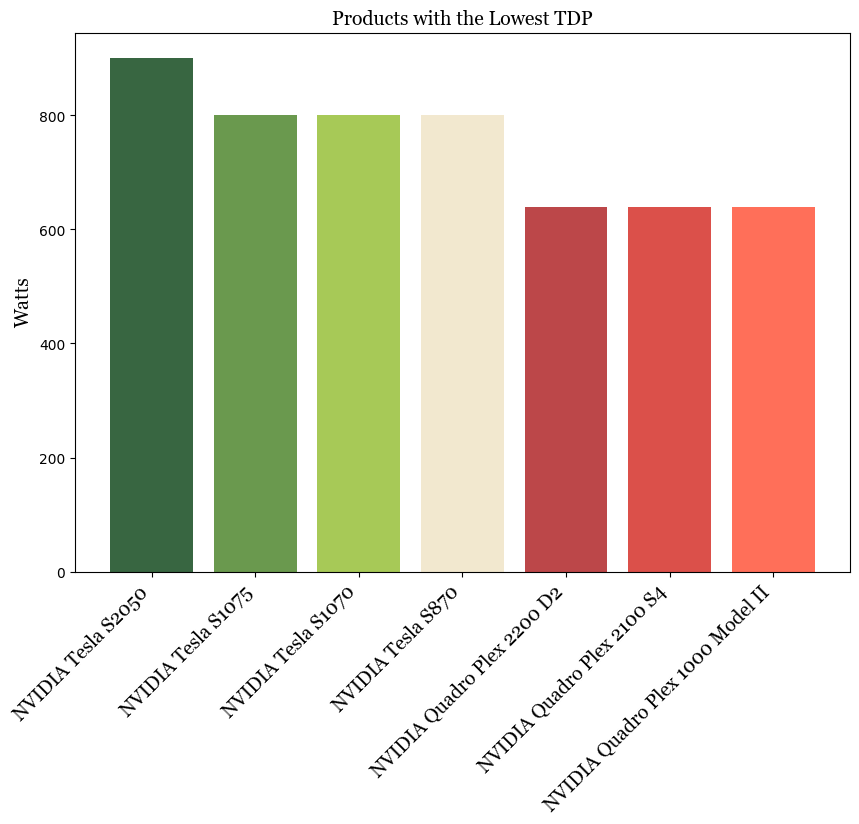

In [75]:
colors = ['#386641', '#6a994e', '#a7c957', '#f2e8cf', '#bc4749', '#db504a', '#ff6f59']

plt.figure(figsize=(10, 7))
plt.bar(df_tdp['Product'], df_tdp['TDP'], color=colors)
plt.title('Products with the Lowest TDP' ,fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Watts' ,fontfamily = 'Georgia', fontsize = 14)
plt.xticks(rotation=45, ha='right',  fontfamily = 'Georgia', fontsize = 14)
plt.show()

## **PROCESS SIZE TREND**

### **GPU Process Size Trend**

In [76]:
df_ps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='GPU').dropna()
df_ps

,Type,Date,Process_Size
2192,GPU,4/3/2011,32.0
2193,GPU,6/25/2002,150.0
2194,GPU,2/23/2019,14.0
2195,GPU,3/2/2008,130.0
2196,GPU,9/30/2008,55.0
...,...,...,...
4849,GPU,2/22/2011,40.0
4850,GPU,6/1/2005,90.0
4851,GPU,3/3/2010,40.0
4852,GPU,3/6/2003,150.0


In [77]:
df_ps['Date'] = pd.to_datetime(df_ps['Date'])
df_ps['Year'] = df_ps['Date'].dt.year
df_ps 

,Type,Date,Process_Size,Year
2192,GPU,2011-04-03,32.0,2011.0
2193,GPU,2002-06-25,150.0,2002.0
2194,GPU,2019-02-23,14.0,2019.0
2195,GPU,2008-03-02,130.0,2008.0
2196,GPU,2008-09-30,55.0,2008.0
...,...,...,...,...
4849,GPU,2011-02-22,40.0,2011.0
4850,GPU,2005-06-01,90.0,2005.0
4851,GPU,2010-03-03,40.0,2010.0
4852,GPU,2003-03-06,150.0,2003.0


In [78]:
df_ps = df_ps.groupby('Year')['Process_Size'].mean().reset_index()
df_ps

,Year,Process_Size
0,2000.0,189.642857
1,2001.0,165.000000
2,2002.0,153.913043
3,2003.0,140.982143
4,2004.0,121.384615
5,2005.0,112.315789
6,2006.0,93.178295
7,2007.0,80.031646
8,2008.0,63.439306
9,2009.0,52.740385


Text(0, 0.5, 'Transistor Size (nm)')

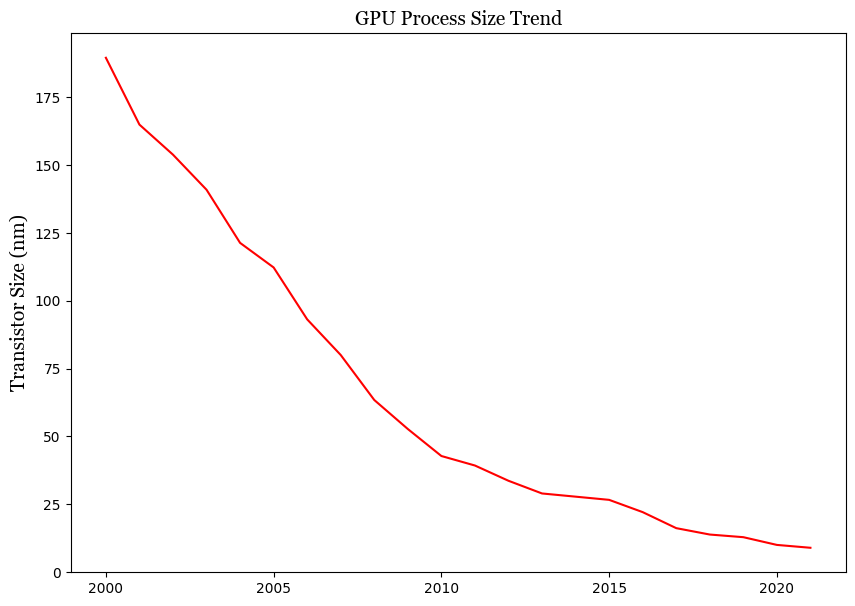

In [79]:

plt.figure(figsize=(10,7))
plt.plot(df_ps['Year'],df_ps['Process_Size'], color = 'red')
plt.title('GPU Process Size Trend',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Transistor Size (nm)' , fontfamily = 'Georgia', fontsize = 14)

### **CPU Process Size Trend**

In [80]:
df_cps = df_w[['Type','Date','Process_Size']].where(df_w['Type']=='CPU').dropna()
df_cps

,Type,Date,Process_Size
0,CPU,2/20/2007,65.0
1,CPU,9/6/2018,14.0
2,CPU,9/2/2020,10.0
3,CPU,9/1/2013,22.0
4,CPU,5/3/2011,45.0
...,...,...,...
2187,CPU,4/6/2021,10.0
2188,CPU,3/16/2020,7.0
2189,CPU,7/1/2007,65.0
2190,CPU,12/1/2004,90.0


In [81]:
df_cps['Date'] = pd.to_datetime(df_cps['Date'])
df_cps['Year'] = df_cps['Date'].dt.year
df_cps 

,Type,Date,Process_Size,Year
0,CPU,2007-02-20,65.0,2007.0
1,CPU,2018-09-06,14.0,2018.0
2,CPU,2020-09-02,10.0,2020.0
3,CPU,2013-09-01,22.0,2013.0
4,CPU,2011-05-03,45.0,2011.0
...,...,...,...,...
2187,CPU,2021-04-06,10.0,2021.0
2188,CPU,2020-03-16,7.0,2020.0
2189,CPU,2007-07-01,65.0,2007.0
2190,CPU,2004-12-01,90.0,2004.0


In [82]:
df_cps = df_cps.groupby('Year')['Process_Size'].mean().reset_index()
df_cps

,Year,Process_Size
0,2000.0,180.000000
1,2001.0,137.790698
2,2002.0,132.564103
3,2003.0,130.000000
4,2004.0,109.705882
5,2005.0,92.954545
6,2006.0,75.925926
7,2007.0,70.869565
8,2008.0,58.571429
9,2009.0,45.913043


Text(0, 0.5, 'Transistor Size (nm)')

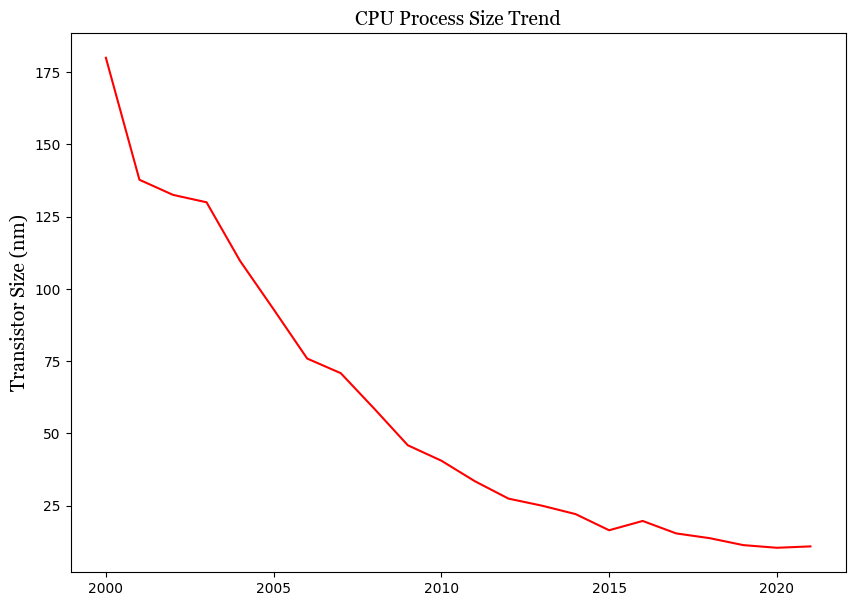

In [83]:
plt.figure(figsize=(10,7))
plt.plot(df_cps['Year'],df_cps['Process_Size'], color = 'red')
plt.title('CPU Process Size Trend',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Transistor Size (nm)' , fontfamily = 'Georgia', fontsize = 14)

### **CPU + GPU Process Size**

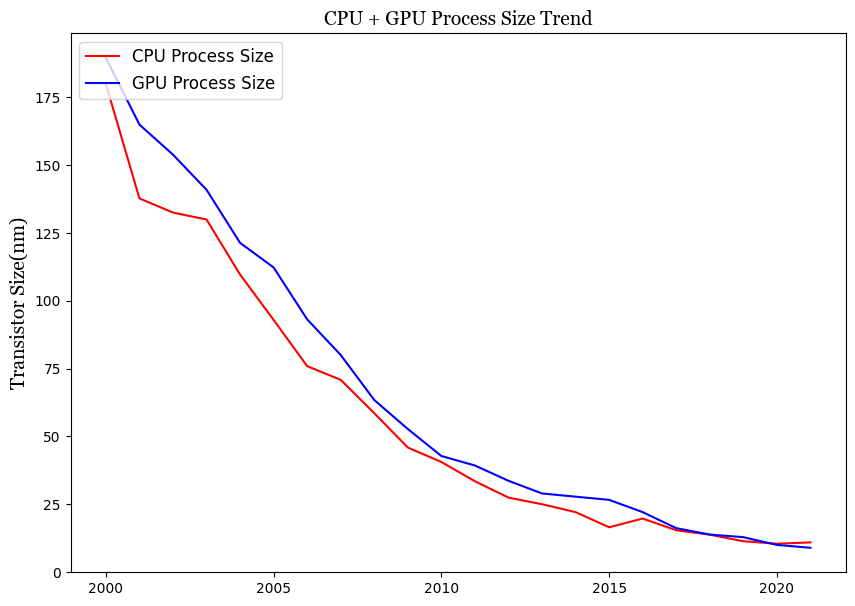

In [93]:
plt.figure(figsize=(10,7))
plt.plot(df_cps['Year'],df_cps['Process_Size'], color = 'red', label = 'CPU Process Size')
plt.plot(df_ps['Year'],df_ps['Process_Size'], color = 'blue',label = 'GPU Process Size')
plt.title('CPU + GPU Process Size Trend',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Transistor Size(nm)' , fontfamily = 'Georgia', fontsize = 14)
plt.legend(fontsize=12, loc='upper left')

## **DIE SIZE TREND**

### **GPU Die Size Trend**

In [84]:
df_ds = df_w[['Type','Date','Die_Size','Vendor']].where(df_w['Type']=='GPU').dropna()
df_ds

,Type,Date,Die_Size,Vendor
2192,GPU,4/3/2011,216.000000,Intel
2193,GPU,6/25/2002,174.000000,Other
2194,GPU,2/23/2019,132.000000,NVIDIA
2195,GPU,3/2/2008,188.440445,Intel
2196,GPU,9/30/2008,73.000000,ATI
...,...,...,...,...
4849,GPU,2/22/2011,332.000000,NVIDIA
4850,GPU,6/1/2005,188.440445,Intel
4851,GPU,3/3/2010,100.000000,NVIDIA
4852,GPU,3/6/2003,65.000000,NVIDIA


In [85]:
df_ds['Date'] = pd.to_datetime(df_ds['Date'])
df_ds['Year'] = df_ds['Date'].dt.year
df_ds 

,Type,Date,Die_Size,Vendor,Year
2192,GPU,2011-04-03,216.000000,Intel,2011.0
2193,GPU,2002-06-25,174.000000,Other,2002.0
2194,GPU,2019-02-23,132.000000,NVIDIA,2019.0
2195,GPU,2008-03-02,188.440445,Intel,2008.0
2196,GPU,2008-09-30,73.000000,ATI,2008.0
...,...,...,...,...,...
4849,GPU,2011-02-22,332.000000,NVIDIA,2011.0
4850,GPU,2005-06-01,188.440445,Intel,2005.0
4851,GPU,2010-03-03,100.000000,NVIDIA,2010.0
4852,GPU,2003-03-06,65.000000,NVIDIA,2003.0


In [86]:
df_ds = df_ds.groupby('Year')['Die_Size'].mean().reset_index()
df_ds

,Year,Die_Size
0,2000.0,106.848015
1,2001.0,111.924925
2,2002.0,114.646995
3,2003.0,138.633286
4,2004.0,176.308971
5,2005.0,188.639598
6,2006.0,175.216775
7,2007.0,174.506855
8,2008.0,197.312619
9,2009.0,176.377358


Text(0, 0.5, 'Die Size(mm^2)')

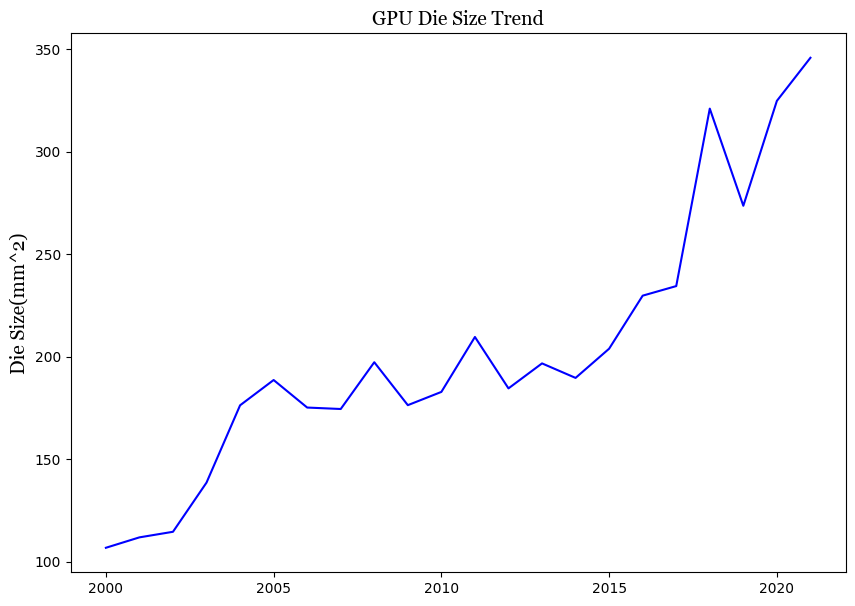

In [87]:
plt.figure(figsize=(10,7))
plt.plot(df_ds['Year'],df_ds['Die_Size'], color = 'blue')
plt.title('GPU Die Size Trend',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Die Size(mm^2)' , fontfamily = 'Georgia', fontsize = 14)

### **CPU Die Size Trend**

In [49]:
df_cds = df_w[['Type','Date','Die_Size','Vendor']].where(df_w['Type']=='CPU').dropna()
df_cds


,Type,Date,Die_Size,Vendor
0,CPU,2/20/2007,77.000000,AMD
1,CPU,9/6/2018,192.000000,AMD
2,CPU,9/2/2020,188.440445,Intel
3,CPU,9/1/2013,160.000000,Intel
4,CPU,5/3/2011,258.000000,AMD
...,...,...,...,...
2187,CPU,4/6/2021,188.440445,Intel
2188,CPU,3/16/2020,156.000000,AMD
2189,CPU,7/1/2007,143.000000,Intel
2190,CPU,12/1/2004,188.440445,AMD


In [50]:
df_cds['Date'] = pd.to_datetime(df_cds['Date'])
df_cds['Year'] = df_cds['Date'].dt.year
df_cds 

,Type,Date,Die_Size,Vendor,Year
0,CPU,2007-02-20,77.000000,AMD,2007.0
1,CPU,2018-09-06,192.000000,AMD,2018.0
2,CPU,2020-09-02,188.440445,Intel,2020.0
3,CPU,2013-09-01,160.000000,Intel,2013.0
4,CPU,2011-05-03,258.000000,AMD,2011.0
...,...,...,...,...,...
2187,CPU,2021-04-06,188.440445,Intel,2021.0
2188,CPU,2020-03-16,156.000000,AMD,2020.0
2189,CPU,2007-07-01,143.000000,Intel,2007.0
2190,CPU,2004-12-01,188.440445,AMD,2004.0


In [51]:
df_cds = df_cds.groupby('Year')['Die_Size'].mean().reset_index()
df_cds

,Year,Die_Size
0,2000.0,129.058824
1,2001.0,124.872093
2,2002.0,130.641026
3,2003.0,168.835123
4,2004.0,148.858889
5,2005.0,155.710329
6,2006.0,172.474156
7,2007.0,134.437713
8,2008.0,163.509349
9,2009.0,185.695652


Text(0, 0.5, 'Die Size(mm^2)')

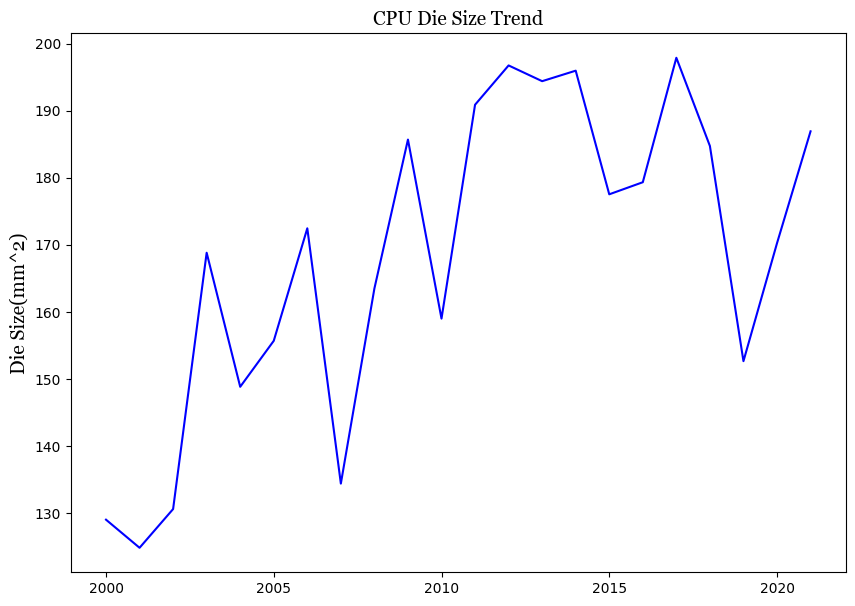

In [52]:
plt.figure(figsize=(10,7))
plt.plot(df_cds['Year'],df_cds['Die_Size'], color = 'blue')
plt.title('CPU Die Size Trend',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Die Size(mm^2)' , fontfamily = 'Georgia', fontsize = 14)

### **CPU + GPU Die Size**

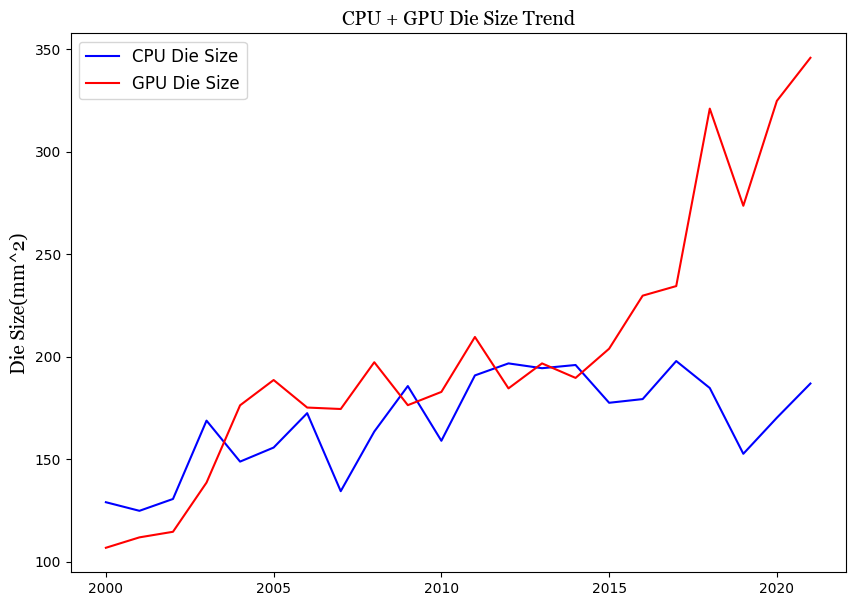

In [59]:
plt.figure(figsize=(10,7))
plt.plot(df_cds['Year'],df_cds['Die_Size'], color = 'blue', label = 'CPU Die Size')
plt.plot(df_ds['Year'],df_ds['Die_Size'], color = 'red',label = 'GPU Die Size')
plt.title('CPU + GPU Die Size Trend',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Die Size(mm^2)' , fontfamily = 'Georgia', fontsize = 14)
plt.legend(fontsize=12, loc='upper left')


## **TRANSISTORS**

### **GPU Transistors**

In [94]:
df_ts = df_w[['Type','Date','Transistors','Vendor']].where(df_w['Type']=='GPU').dropna()
df_ts

,Type,Date,Transistors,Vendor
2192,GPU,4/3/2011,1160.000000,Intel
2193,GPU,6/25/2002,80.000000,Other
2194,GPU,2/23/2019,3300.000000,NVIDIA
2195,GPU,3/2/2008,1929.922279,Intel
2196,GPU,9/30/2008,242.000000,ATI
...,...,...,...,...
4849,GPU,2/22/2011,1950.000000,NVIDIA
4850,GPU,6/1/2005,1929.922279,Intel
4851,GPU,3/3/2010,486.000000,NVIDIA
4852,GPU,3/6/2003,29.000000,NVIDIA


In [97]:
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts['Year'] = df_ts['Date'].dt.year
df_ts 

,Type,Date,Transistors,Vendor,Year
2192,GPU,2011-04-03,1160.000000,Intel,2011.0
2193,GPU,2002-06-25,80.000000,Other,2002.0
2194,GPU,2019-02-23,3300.000000,NVIDIA,2019.0
2195,GPU,2008-03-02,1929.922279,Intel,2008.0
2196,GPU,2008-09-30,242.000000,ATI,2008.0
...,...,...,...,...,...
4849,GPU,2011-02-22,1950.000000,NVIDIA,2011.0
4850,GPU,2005-06-01,1929.922279,Intel,2005.0
4851,GPU,2010-03-03,486.000000,NVIDIA,2010.0
4852,GPU,2003-03-06,29.000000,NVIDIA,2003.0


In [99]:
df_ts = df_ts.groupby('Year')['Transistors'].mean().reset_index()
df_ts

,Year,Transistors
0,2000.0,215.525561
1,2001.0,119.568256
2,2002.0,104.273110
3,2003.0,139.747224
4,2004.0,332.929494
5,2005.0,294.678484
6,2006.0,348.024983
7,2007.0,388.793041
8,2008.0,566.823445
9,2009.0,613.830189


Text(0, 0.5, 'Amount of Transistors')

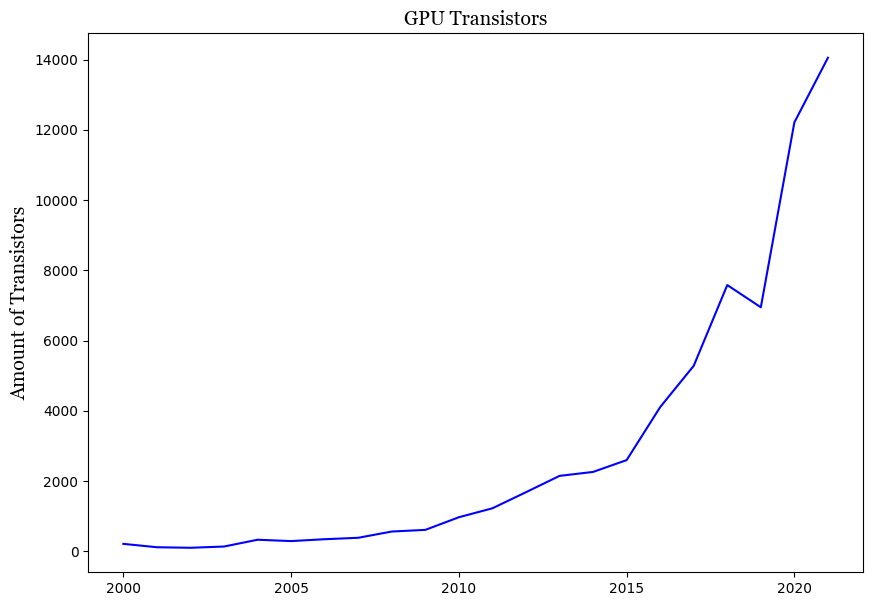

In [101]:
plt.figure(figsize=(10,7))
plt.plot(df_ts['Year'],df_ts['Transistors'], color = 'blue')
plt.title('GPU Transistors',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Amount of Transistors' , fontfamily = 'Georgia', fontsize = 14)

### **CPU Transistors**

In [104]:
df_cts = df_w[['Type','Date','Transistors','Vendor']].where(df_w['Type']=='CPU').dropna()
df_cts['Date'] = pd.to_datetime(df_cts['Date'])
df_cts['Year'] = df_cts['Date'].dt.year
df_cts = df_cts.groupby('Year')['Transistors'].mean().reset_index()
df_cts


,Year,Transistors
0,2000.0,38.000000
1,2001.0,65.197674
2,2002.0,51.846154
3,2003.0,89.315068
4,2004.0,104.213235
5,2005.0,230.580378
6,2006.0,478.256880
7,2007.0,398.007734
8,2008.0,606.076101
9,2009.0,533.860870


Text(0, 0.5, 'Amount of Transistors')

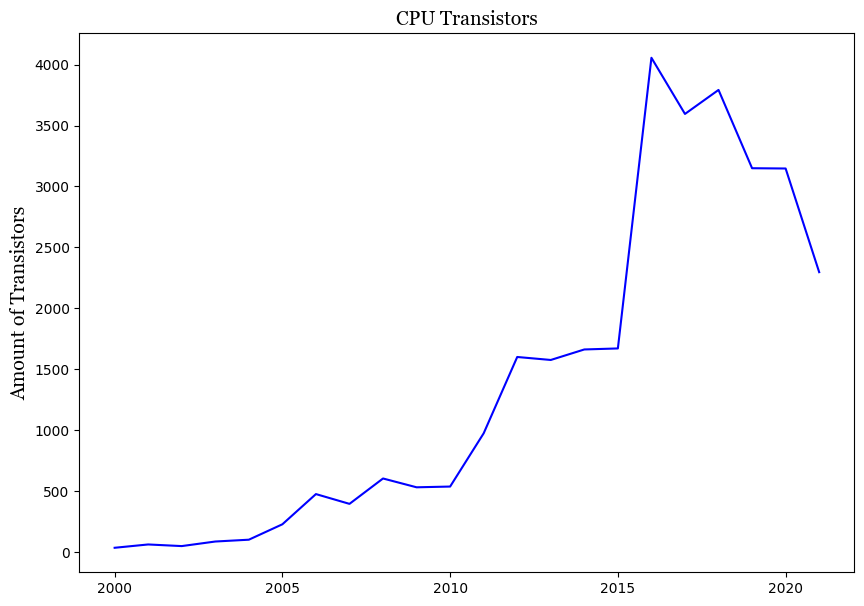

In [105]:
plt.figure(figsize=(10,7))
plt.plot(df_cts['Year'],df_cts['Transistors'], color = 'blue')
plt.title('CPU Transistors',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Amount of Transistors' , fontfamily = 'Georgia', fontsize = 14)

### **CPU + GPU Transistors**

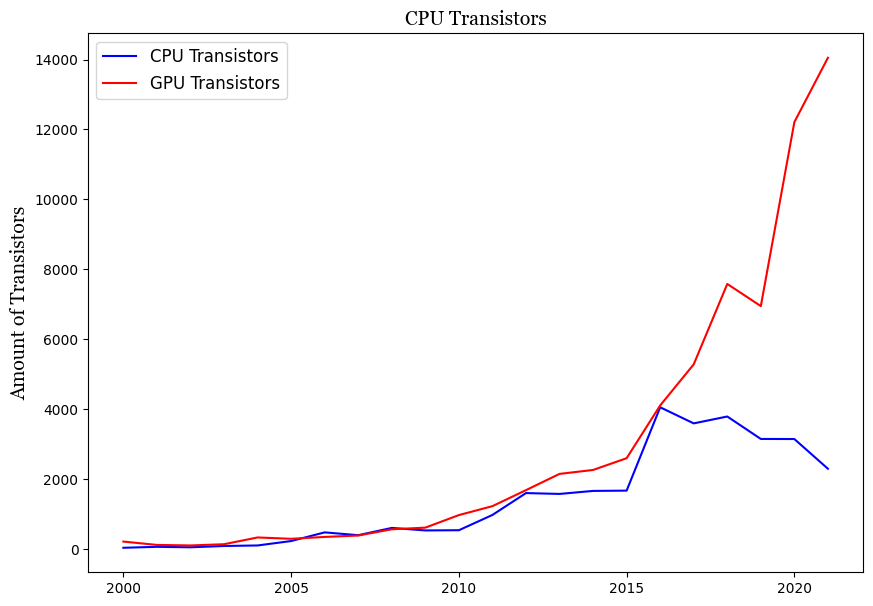

In [108]:
plt.figure(figsize=(10,7))
plt.plot(df_cts['Year'],df_cts['Transistors'], color = 'blue', label = 'CPU Transistors')
plt.plot(df_ts['Year'],df_ts['Transistors'], color = 'red', label = 'GPU Transistors')
plt.title('CPU Transistors',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Amount of Transistors' , fontfamily = 'Georgia', fontsize = 14)
plt.legend(fontsize=12, loc='upper left')

## **FREQUENCY**

### **GPU Frequency (MHz)**

In [109]:
df_fq = df_w[['Type','Date','Frequency','Vendor']].where(df_w['Type']=='GPU').dropna()
df_fq['Date'] = pd.to_datetime(df_fq['Date'])
df_fq['Year'] = df_fq['Date'].dt.year
df_fq = df_fq.groupby('Year')['Frequency'].mean().reset_index()
df_fq

,Year,Frequency
0,2000.0,165.800000
1,2001.0,196.061224
2,2002.0,244.289855
3,2003.0,304.803571
4,2004.0,367.376923
5,2005.0,405.273684
6,2006.0,460.472868
7,2007.0,524.360759
8,2008.0,564.190751
9,2009.0,584.584906


Text(0, 0.5, 'Frequency (MHz)')

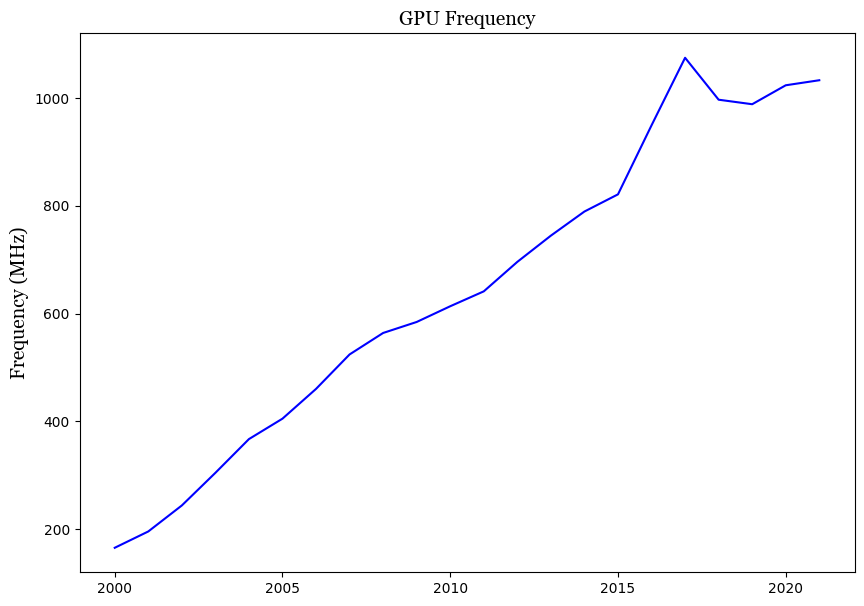

In [111]:
plt.figure(figsize=(10,7))
plt.plot(df_fq['Year'],df_fq['Frequency'], color = 'blue')
plt.title('GPU Frequency',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Frequency (MHz)' , fontfamily = 'Georgia', fontsize = 14)

### **CPU Frequency (MHz)**

In [114]:
df_cfq = df_w[['Type','Date','Frequency','Vendor']].where(df_w['Type']=='CPU').dropna()
df_cfq['Date'] = pd.to_datetime(df_cfq['Date'])
df_cfq['Year'] = df_cfq['Date'].dt.year
df_cfq = df_cfq.groupby('Year')['Frequency'].mean().reset_index()
df_cfq

,Year,Frequency
0,2000.0,992.117647
1,2001.0,1801.662791
2,2002.0,2050.897436
3,2003.0,2155.369863
4,2004.0,2267.705882
5,2005.0,2409.831169
6,2006.0,2370.696296
7,2007.0,2180.652174
8,2008.0,2287.241071
9,2009.0,2519.904348


Text(0, 0.5, 'Frequency (MHz)')

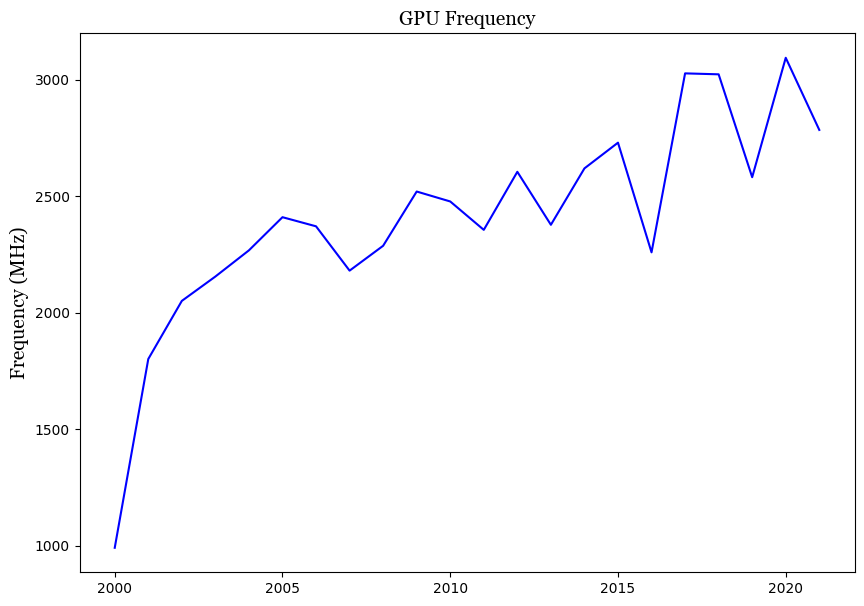

In [115]:
plt.figure(figsize=(10,7))
plt.plot(df_cfq['Year'],df_cfq['Frequency'], color = 'blue')
plt.title('GPU Frequency',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Frequency (MHz)' , fontfamily = 'Georgia', fontsize = 14)

### **CPU + GPU Frequency (MHz)**

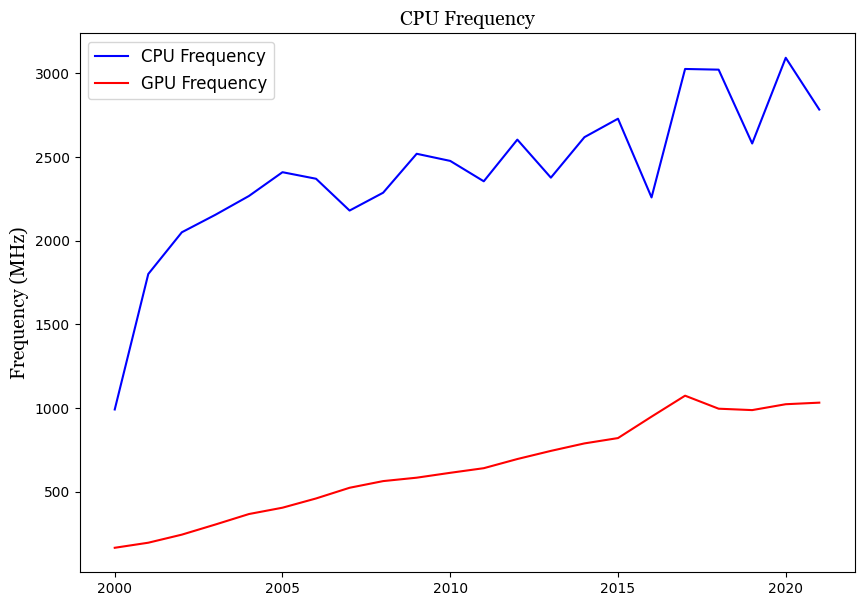

In [118]:
plt.figure(figsize=(10,7))
plt.plot(df_cfq['Year'],df_cfq['Frequency'], color = 'blue', label = 'CPU Frequency')
plt.plot(df_fq['Year'],df_fq['Frequency'], color = 'red', label = 'GPU Frequency')
plt.title('CPU Frequency',  fontfamily = 'Georgia', fontsize = 14)
plt.ylabel('Frequency (MHz)' , fontfamily = 'Georgia', fontsize = 14)
plt.legend(fontsize=12, loc='upper left')